
# Project: Investigate The Movie Database (TMDb) data set - 01/03/2019

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The project analyzes a data set of about 10,000 movies collected from The Movie Database (TMDb) released between 1960 and 2015.

The analysis focuses on the relationship between popularity and average vote. What are the most popular genres and movies? Do  popular movies receive higher votes? These questions are answered in the course of the analysis.

In [1]:
# Import of Numpy, Pandas and Matplotlib packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# TMDb data load

tmdb = pd.read_csv('tmdb-movies.csv')
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Verify the data set composition  

tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# Descriptive statistics summary

tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



The data set has 10866 entries and 21 columns. 9 columns ('imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres' and 'production_companies') have null values while columns 'budget', 'revenue', 'budget_adj' and 'revenue_adj' have zero values which are incorrect. These issues are addressed in the following section.

### Data Cleaning: drop nulls, zeros and duplicates

In [5]:
#Drop of needless columns 

tmdb.drop(['homepage', 'tagline', 'keywords', 'production_companies', 'budget','revenue', 'budget_adj', 'revenue_adj'], axis=1, inplace=True); 

In [6]:
# Drop null values

tmdb.dropna(inplace = True); 

In [7]:
# Verify the number of duplicates

tmdb.duplicated().sum()

1

In [8]:
# Drop duplicate values

tmdb.drop_duplicates(inplace = True);

In [9]:
# Verify the resulting dataset

tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10724 entries, 0 to 10865
Data columns (total 13 columns):
id                10724 non-null int64
imdb_id           10724 non-null object
popularity        10724 non-null float64
original_title    10724 non-null object
cast              10724 non-null object
director          10724 non-null object
overview          10724 non-null object
runtime           10724 non-null int64
genres            10724 non-null object
release_date      10724 non-null object
vote_count        10724 non-null int64
vote_average      10724 non-null float64
release_year      10724 non-null int64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.1+ MB



The data set has 10724 rows and 13 columns after the data cleaning process.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - What are the most popular movies and genres?

In [10]:
# Top 10 most popular movies

tmdb.nlargest(10,'popularity')['original_title']

0                              Jurassic World
1                          Mad Max: Fury Road
629                              Interstellar
630                   Guardians of the Galaxy
2                                   Insurgent
631       Captain America: The Winter Soldier
1329                                Star Wars
632                                 John Wick
3                Star Wars: The Force Awakens
633     The Hunger Games: Mockingjay - Part 1
Name: original_title, dtype: object

In the orginal data set, the ‘genres’ column contains multiple values separated by pipe (|) characters. These values should be separated into different rows to perform further analysis. 

The 'genre' data frame is created [Student Hub]. It contains an additional column called 'genre':


In [11]:
genre = tmdb.join(tmdb['genres'].str.split('|', expand = True).stack()

        .reset_index(level = 1, drop = True).rename('genre')).reset_index(drop = True)

In [12]:
genre.head(1)

,id,imdb_id,popularity,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,genre
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,Action


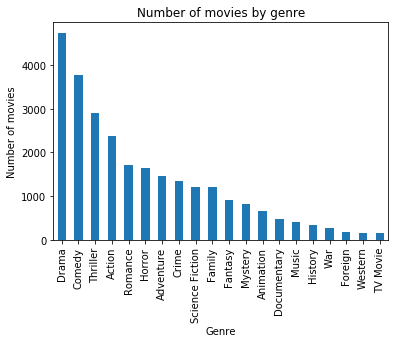

In [13]:
# Visualize the number of movies by genre

plot1 = genre['genre'].value_counts().plot(kind = 'bar', title = 'Number of movies by genre', colormap='tab10' )
plot1.set(xlabel = "Genre", ylabel = "Number of movies")
plot1;

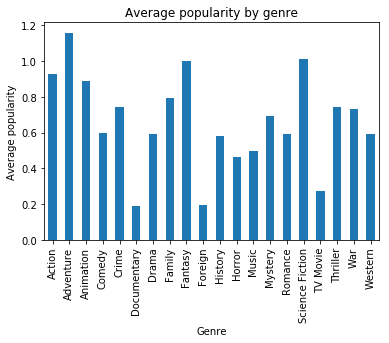

In [14]:
# Visualize the average popularity by genre

plot2 = genre.groupby('genre').popularity.mean().plot(kind = 'bar', title = 'Average popularity by genre', colormap='tab10')
plot2.set(xlabel = "Genre", ylabel = "Average popularity")
plot2;

Adventure, Fantasy and Sci-Fi are the most popular genres.

### Research Question 2 - Do popular movies receive better votes? 

In [15]:
# Top 10 best rated movies

tmdb.nlargest(10,'vote_average')['original_title']

3894                        The Story of Film: An Odyssey
1200                        Black Mirror: White Christmas
6911                                    Pink Floyd: Pulse
3690                                    The Art of Flight
8221    A Personal Journey with Martin Scorsese Throug...
8411                                Queen - Rock Montreal
8839                  Dave Chappelle: Killin' Them Softly
609         The Jinx: The Life and Deaths of Robert Durst
2334                       Rush: Beyond the Lighted Stage
4178                             The Shawshank Redemption
Name: original_title, dtype: object

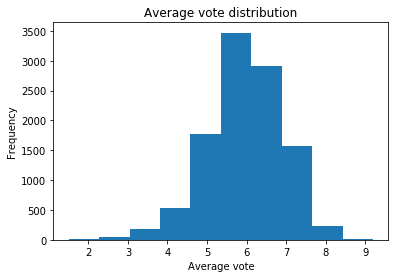

In [16]:
# Visualize the average vote distribution

plot3 = tmdb.vote_average.plot(kind = "hist", title = 'Average vote distribution')
plot3.set(xlabel = "Average vote", ylabel = "Frequency")
plot3;

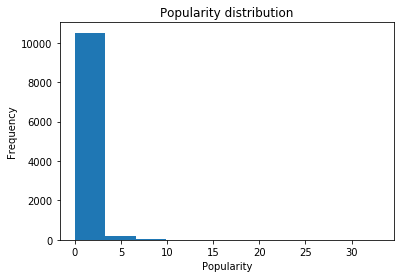

In [17]:
# Visualize the popularity distribution

plot3 = tmdb.popularity.plot(kind = "hist", title = 'Popularity distribution')
plot3.set(xlabel = "Popularity", ylabel = "Frequency")
plot3;

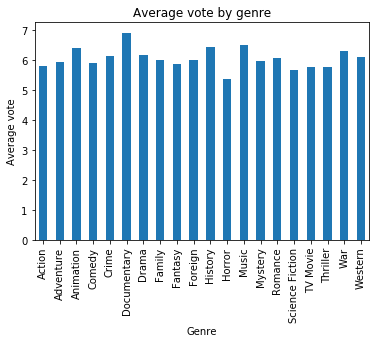

In [33]:
# Visualize the average vote by genre

plot4 = genre.groupby('genre').vote_average.mean().plot(kind = 'bar', title = 'Average vote by genre', colormap='tab10')
plot4.set(xlabel = "Genre", ylabel = "Average vote")
plot4;

Documentary, History, Animation and Music movies receive higher votes

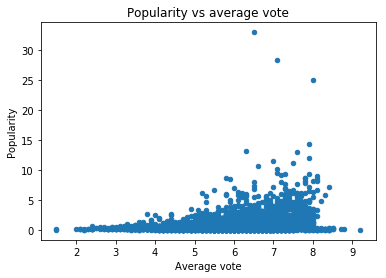

In [19]:
# Visualize the correlation between average vote and popularity

plot5 = tmdb.plot(x = 'vote_average', y = 'popularity', kind = 'scatter', title = 'Popularity vs average vote')
plot5.set(xlabel = "Average vote", ylabel = "Popularity")
plot5;

In [20]:
# Average popularity value

tmdb.popularity.mean()

0.6528576694330472

In [27]:
# Split the data set in two subsets

low_popularity = tmdb.query('popularity < 0.6528')
high_popularity = tmdb.query('popularity >= 0.6528')

In [28]:
# Calculate the median vote in low and high popularity movies

low_popularity.vote_average.mean(), high_popularity.vote_average.mean()

(5.849934997399895, 6.254815303430079)

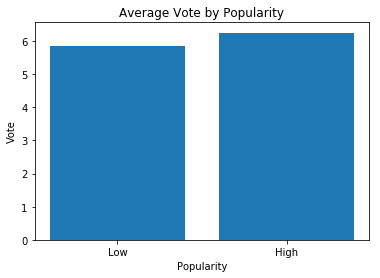

In [29]:
# Create a bar chart

low_popularity = low_popularity.vote_average.mean()
high_popularity = high_popularity.vote_average.mean()

locations = [1, 2]
heights = [low_popularity, high_popularity]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Vote by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Vote');

Although none of the most popular movies has received the highest votes, there is a positive correlation between the two dimensions. Popular movies get higher votes even though the difference is not prominent.

<a id='conclusions'></a>
## Conclusions

The analysis was conducted on a data set of 10724 movies released between 1960 and 2015 which is representive of the total population. The original data set contains several null and zero values that have been removed during the data wrangling phase.  

In the course the data exploration phase, has emerged that Adventure, Fantasy and Animation are the most popular genres while Documentary, History, Animation and Music movies are those that receive higher votes.

There is a positive correlation between popularity and vote although the difference is not prominent, meaning that other variables could influence the popularity, like the cast or budget. Furthermore, it is not clear what mediums are used to measure the popularity or if there are other factors not included in the data set. 


In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0